In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000)
df = pd.read_csv("wireshark1.csv", index_col='No.')

In [4]:
df.loc[df['Protocol'] == 'ARP', 'ProtocolNumber'] = '1'
df.loc[df['Protocol'] == 'UDP', 'ProtocolNumber'] = '2'
df.loc[df['Protocol'] == 'SSDP', 'ProtocolNumber'] = '3'
df.loc[df['Protocol'] == 'TCP', 'ProtocolNumber'] = '4'
df.loc[df['Protocol'] == 'DHCPv6', 'ProtocolNumber'] = '5'
df.loc[df['Protocol'] == 'DNS', 'ProtocolNumber'] = '6'
df.loc[df['Protocol'] == 'HTTP', 'ProtocolNumber'] = '7'
df.loc[df['Protocol'] == 'ICMP', 'ProtocolNumber'] = '8'
df.loc[df['Protocol'] == 'ICMPv6', 'ProtocolNumber'] = '9'
df.loc[df['Protocol'] == 'IGMPv3', 'ProtocolNumber'] = '10'
df.loc[df['Protocol'] == 'LLMNR', 'ProtocolNumber'] = '11'
df.loc[df['Protocol'] == 'MDNS', 'ProtocolNumber'] = '12'
df.loc[df['Protocol'] == 'NTP', 'ProtocolNumber'] = '13'
df.loc[df['Protocol'] == 'XID', 'ProtocolNumber'] = '14'
df.loc[df['Protocol'] == 'BROWSER', 'ProtocolNumber'] = '15'

In [5]:
df['totalrequests'] = df.groupby('Source')['Source'].transform('count')

In [6]:
dfdos = df[df['Source'] != "192.168.0.218"]
dfdos = dfdos[dfdos['Protocol'] != 'DNS']
dfdos = dfdos[dfdos['Protocol'] != 'ARP']
dfdos = dfdos[dfdos['Protocol'] != 'XID']
dfdos = dfdos[dfdos['Protocol'] != 'NTP']
dfdos = dfdos[dfdos['Protocol'] != 'DHCPv6']
dfdos = dfdos[dfdos['Protocol'] != 'SSDP']
dfdos = dfdos[dfdos['Protocol'] != 'IGMPv3']
dfdos = dfdos[dfdos['Protocol'] != 'MDNS']
dfdos = dfdos[dfdos['Protocol'] != 'LLMNR']
dfdos = dfdos[dfdos['Protocol'] != 'BROWSER']
dfdos = dfdos[dfdos['Protocol'] != 'ICMPv6']

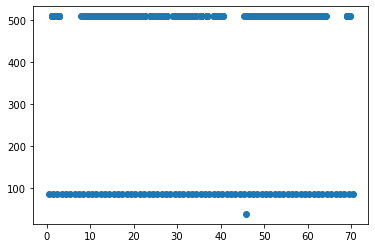

In [7]:
#Reset Index Count
dfdos = dfdos.reset_index(drop=True)

plt.scatter(dfdos['Time'],dfdos['totalrequests'])
plt.show()

In [8]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(dfdos[['Time', 'totalrequests']])
print(y_predicted)

[3 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 3 3 3 3 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 3 2 2 2 2 3 2
 2 3 2 2 2 2 3 2 2 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2
 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [9]:
dfdos['cluster'] = y_predicted

dfdos1 = dfdos[dfdos.cluster==0]
dfdos2 = dfdos[dfdos.cluster==1]
dfdos3 = dfdos[dfdos.cluster==2]
dfdos4 = dfdos[dfdos.cluster==3]


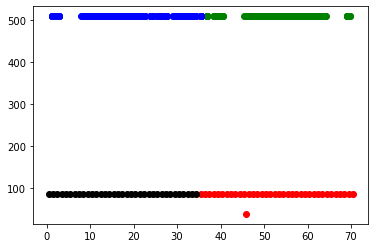

In [10]:
plt.scatter(dfdos1['Time'],dfdos1['totalrequests'],color = 'green')
plt.scatter(dfdos2['Time'],dfdos2['totalrequests'],color = 'red')
plt.scatter(dfdos3['Time'],dfdos3['totalrequests'],color = 'blue')
plt.scatter(dfdos4['Time'],dfdos4['totalrequests'],color = 'black')

Text(0, 0.5, 'Total Requests')

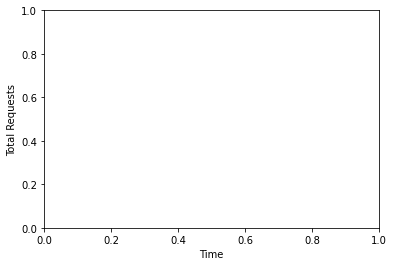

In [11]:
plt.xlabel('Time')
plt.ylabel('Total Requests')

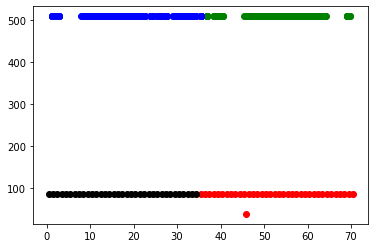

In [12]:
plt.scatter(dfdos1['Time'],dfdos1['totalrequests'],color = 'green')
plt.scatter(dfdos2['Time'],dfdos2['totalrequests'],color = 'red')
plt.scatter(dfdos3['Time'],dfdos3['totalrequests'],color = 'blue')
plt.scatter(dfdos4['Time'],dfdos4['totalrequests'],color = 'black')

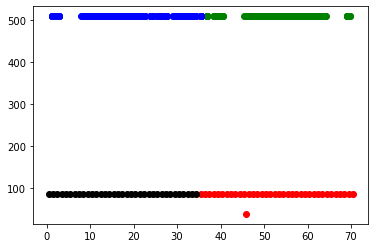

In [13]:
dfdos1 = dfdos[dfdos.cluster==0]
dfdos2 = dfdos[dfdos.cluster==1]
dfdos3 = dfdos[dfdos.cluster==2]
dfdos4 = dfdos[dfdos.cluster==3]
plt.scatter(dfdos1['Time'],dfdos1['totalrequests'],color = 'green')
plt.scatter(dfdos2['Time'],dfdos2['totalrequests'],color = 'red')
plt.scatter(dfdos3['Time'],dfdos3['totalrequests'],color = 'blue')
plt.scatter(dfdos4['Time'],dfdos4['totalrequests'],color = 'black')

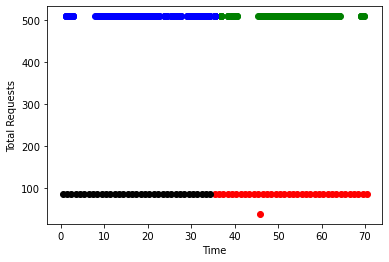

In [14]:
dfdos1 = dfdos[dfdos.cluster==0]
dfdos2 = dfdos[dfdos.cluster==1]
dfdos3 = dfdos[dfdos.cluster==2]
dfdos4 = dfdos[dfdos.cluster==3]
plt.scatter(dfdos1['Time'],dfdos1['totalrequests'],color = 'green')
plt.scatter(dfdos2['Time'],dfdos2['totalrequests'],color = 'red')
plt.scatter(dfdos3['Time'],dfdos3['totalrequests'],color = 'blue')
plt.scatter(dfdos4['Time'],dfdos4['totalrequests'],color = 'black')
plt.xlabel('Time')
plt.ylabel('Total Requests')
plt.show()

In [15]:
dfdos

,Time,Source,Destination,Protocol,Length,Info,ProtocolNumber,totalrequests,cluster
0,0.430294,192.168.0.117,192.168.0.255,UDP,305,54915 > 54915 Len=263,2,86,3
1,1.175370,192.168.0.185,192.168.0.218,TCP,74,51326 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...,4,510,2
2,1.175490,192.168.0.185,192.168.0.218,TCP,66,51326 > 80 [ACK] Seq=1 Ack=1 Win=64256 Len=0...,4,510,2
3,1.175546,192.168.0.185,192.168.0.218,HTTP,514,GET /DVWA/vulnerabilities/brute/ HTTP/1.1,7,510,2
4,1.176501,192.168.0.185,192.168.0.218,TCP,66,51326 > 80 [ACK] Seq=449 Ack=1734 Win=63488 ...,4,510,2
5,1.429842,192.168.0.117,192.168.0.255,UDP,305,54915 > 54915 Len=263,2,86,3
6,1.572367,192.168.0.185,192.168.0.218,HTTP,535,GET /DVWA/vulnerabilities/exec/ HTTP/1.1,7,510,2
7,1.573298,192.168.0.185,192.168.0.218,TCP,66,51326 > 80 [ACK] Seq=918 Ack=3433 Win=63488 ...,4,510,2
8,1.903670,192.168.0.185,192.168.0.218,HTTP,534,GET /DVWA/vulnerabilities/csrf/ HTTP/1.1,7,510,2
9,1.904588,192.168.0.185,192.168.0.218,TCP,66,51326 > 80 [ACK] Seq=1386 Ack=5312 Win=63488...,4,510,2


In [23]:
scaler = MinMaxScaler()
scaler.fit(dfdos['totalrequests'])
dfdos['totalrequests'] = scaler.transform(dfdos['totalrequests'])
dfdos

ValueError: Expected 2D array, got 1D array instead:
array=[ 86. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510.  86. 510.
 510. 510. 510.  86.  86.  86.  86.  86. 510. 510.  86. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510.  86.
 510. 510. 510. 510. 510.  86. 510. 510. 510. 510.  86. 510. 510.  86.
 510. 510. 510. 510.  86. 510. 510.  86. 510. 510.  86. 510. 510. 510.
 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86.
 510. 510. 510. 510.  86. 510. 510. 510. 510.  86. 510. 510. 510. 510.
 510. 510.  86. 510. 510. 510. 510. 510.  86. 510. 510.  86. 510. 510.
 510. 510. 510. 510.  86.  86. 510. 510. 510. 510. 510. 510. 510. 510.
  86. 510. 510.  86. 510. 510.  86.  86.  86.  86.  86. 510. 510.  38.
 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86.
 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510.
 510. 510. 510. 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510.
 510. 510. 510. 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510.
 510. 510. 510.  86. 510. 510. 510. 510. 510. 510. 510. 510. 510. 510.
  86. 510. 510. 510. 510. 510. 510. 510. 510.  86.  86.  86.  86.  86.
 510. 510. 510. 510.  86. 510. 510.  86.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.